In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
start_50 = pd.read_csv("50_Startups.csv")

In [3]:
start_50

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
start_50.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
start_50.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
start_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# check for missing value
start_50.isna().sum() # start_50.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
start_50.corr()

<ipython-input-8-448c381c438b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  start_50.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
# DATA TYPE CONVERSION FROM OBJECT TO NUMERIC
start_50['State']=start_50['State'] .astype('category')

In [10]:
startup = start_50.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startup

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
startup.corr()

<ipython-input-11-7b5aa6741724>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


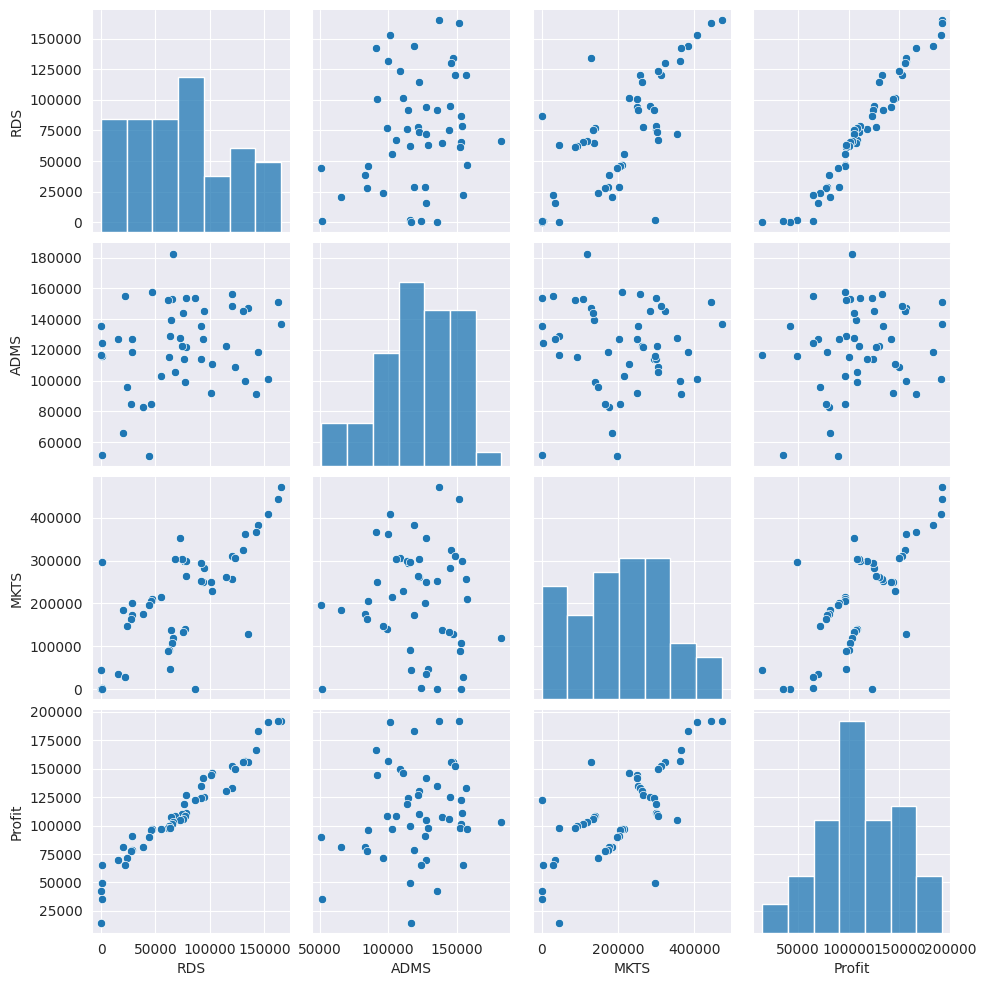

In [12]:
# scatter plot and correlation analysis
sns.set_style(style = 'darkgrid')
sns.pairplot(startup)

<Axes: xlabel='Profit', ylabel='State'>

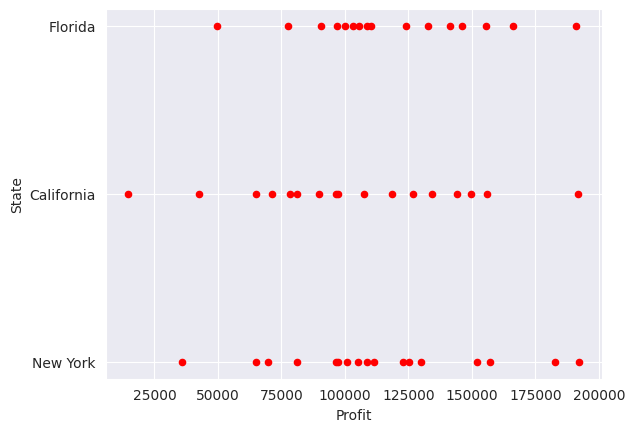

In [13]:
startup.plot.scatter(x = "Profit",y = "State",c = "red") # try profit and state

<Axes: xlabel='State', ylabel='Profit'>

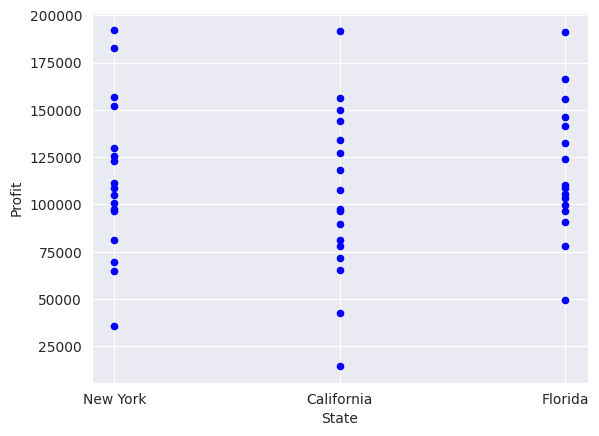

In [14]:
startup.plot.scatter(x = "State",y = "Profit",c = "blue") # try state and profit

In [15]:
# preparing the model
model = smf.ols('Profit~RDS+ADMS+MKTS',data = startup).fit()

In [16]:
# coefficients of beta values
model.params


Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [17]:
# t value and pvalue print
print('***t-values***','\n',model.tvalues,'***p-values***','\n',model.pvalues)

***t-values*** 
 Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64 ***p-values*** 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [18]:
# R squared value
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        06:28:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# simple linear regression
m1_v = smf.ols('Profit~RDS',data = startup).fit()
print(m1_v.tvalues,'\n',m1_v.pvalues)

Intercept    19.320288
RDS          29.151139
dtype: float64 
 Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64


In [22]:
m1_v = smf.ols('Profit~ADMS',data = startup).fit()
print(m1_v.tvalues,'\n',m1_v.pvalues)

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [23]:
m1_v = smf.ols('Profit~MKTS',data = startup).fit()
print(m1_v.tvalues,'\n',m1_v.pvalues)

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [24]:
# calculating VIF
rsq_rds =smf.ols('RDS~ADMS+MKTS',data = startup).fit().rsquared
vif_rds = 1/(1-rsq_rds)
rsq_adms = smf.ols('ADMS~RDS+MKTS',data = startup).fit().rsquared
vif_adms = 1/(1-rsq_adms)
rsq_mkts = smf.ols('MKTS~RDS+ADMS',data = startup).fit().rsquared
vif_mkts = 1/(1-rsq_mkts)



# storing vif values in a dataframe
d1 = {'Variables':['ADMS','RDS','MKTS'],'VIF':[vif_adms,vif_rds,vif_mkts]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,ADMS,1.175091
1,RDS,2.468903
2,MKTS,2.326773


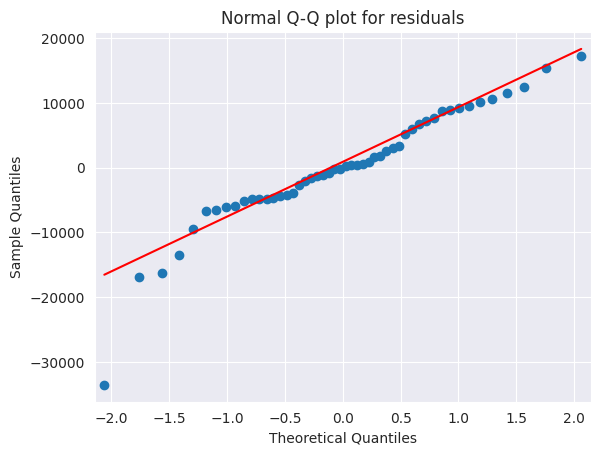

In [25]:
# Residual Analysis
# Q-Q plot
model = smf.ols('Profit~ADMS+RDS+MKTS',data = startup).fit()
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('Normal Q-Q plot for residuals')
plt.show()


In [26]:
# to print index of outliers
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

In [27]:
list(np.where(model.resid<10))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 23, 24, 26, 27, 29,
        31, 32, 33, 39, 46, 47, 48, 49])]

In [28]:
# residual plot of homoscedasticity : constant variance
# model = smf.ols('Profit~ADMS+RDS+MKTS',data = startup).fit()
# function for standardization i.e zscore,function name: get_standardization_values
def get_standardized_values(vals):
  return(vals - vals.mean())/vals.std()#this is zscore

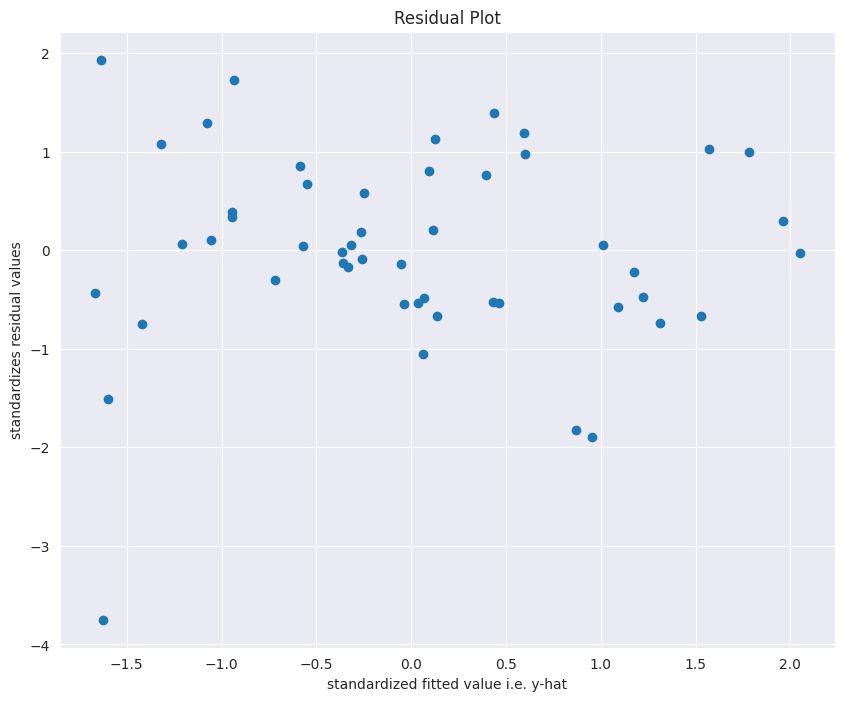

In [29]:
plt.figure(figsize =(10,8))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))# y-hat and error
plt.title('Residual Plot')
plt.xlabel('standardized fitted value i.e. y-hat')
plt.ylabel('standardizes residual values')
plt.show()

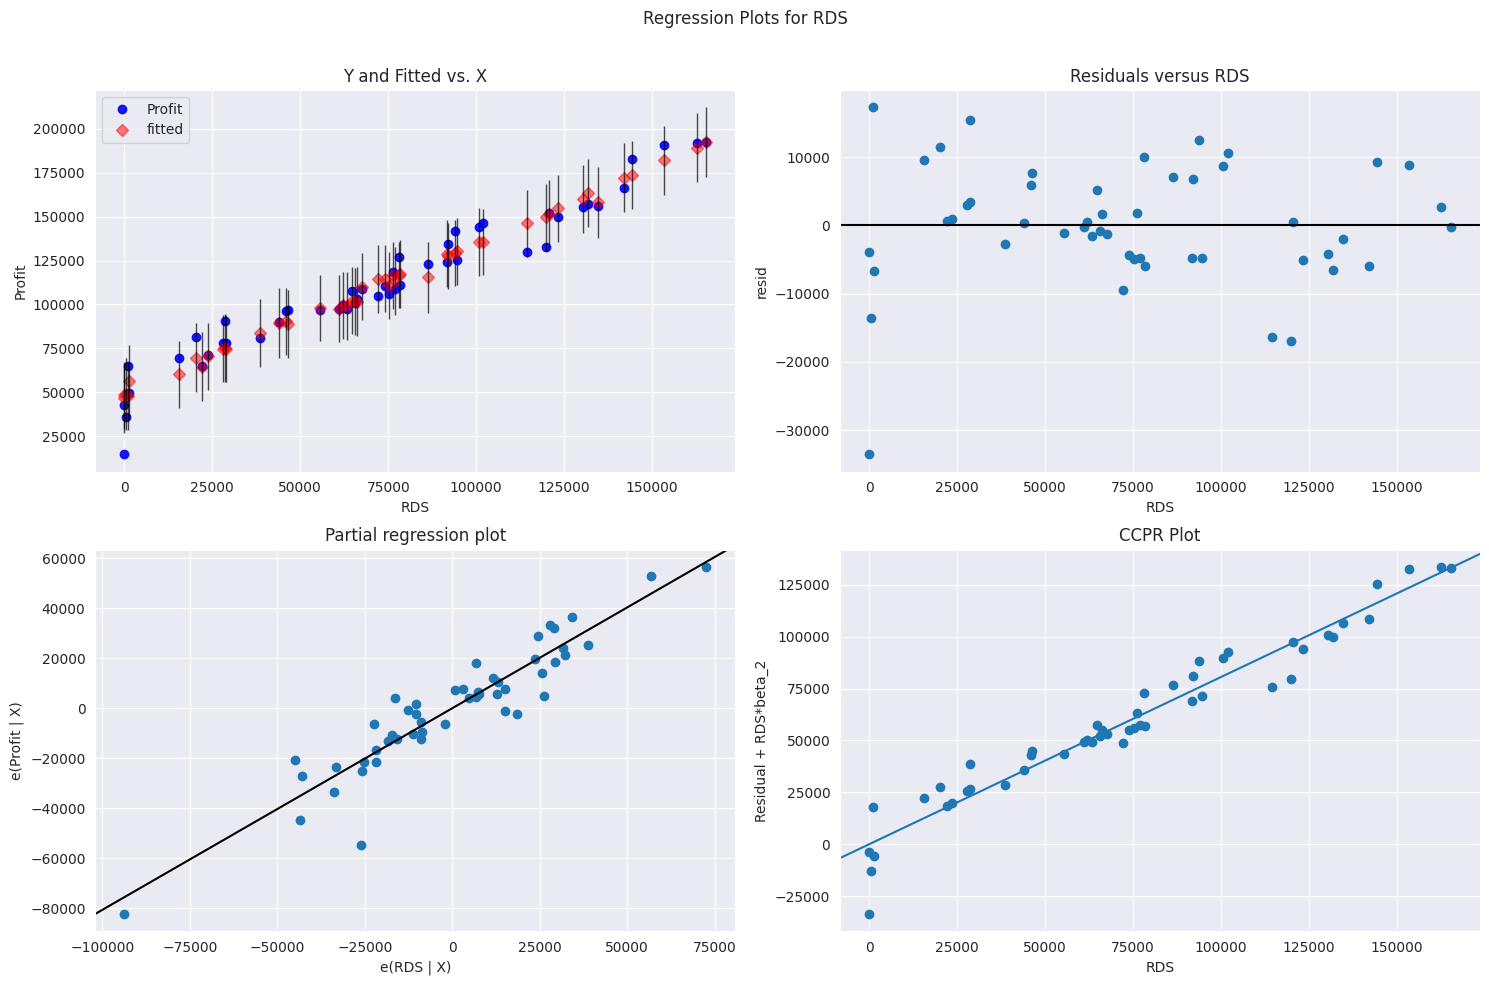

In [30]:
# residual vs regressors
fig = plt.figure(figsize =(15,10))
fig = sm.graphics.plot_regress_exog(model,'RDS',fig = fig)
plt.show()

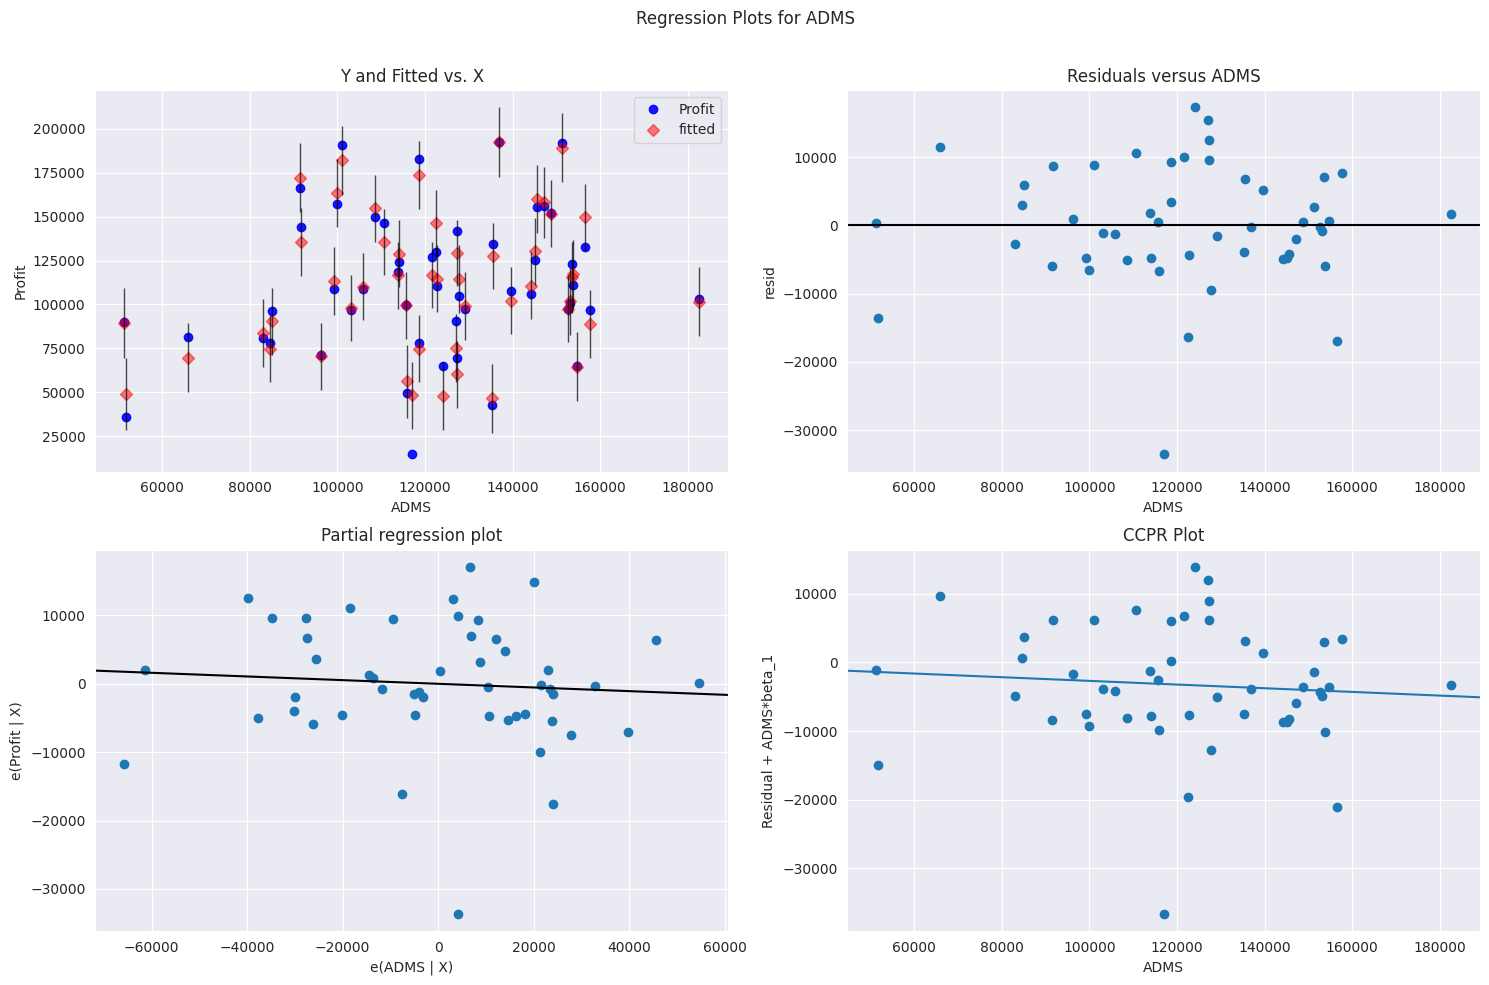

In [32]:
fig = plt.figure(figsize =(15,10))
fig = sm.graphics.plot_regress_exog(model,'ADMS',fig = fig)
plt.show()

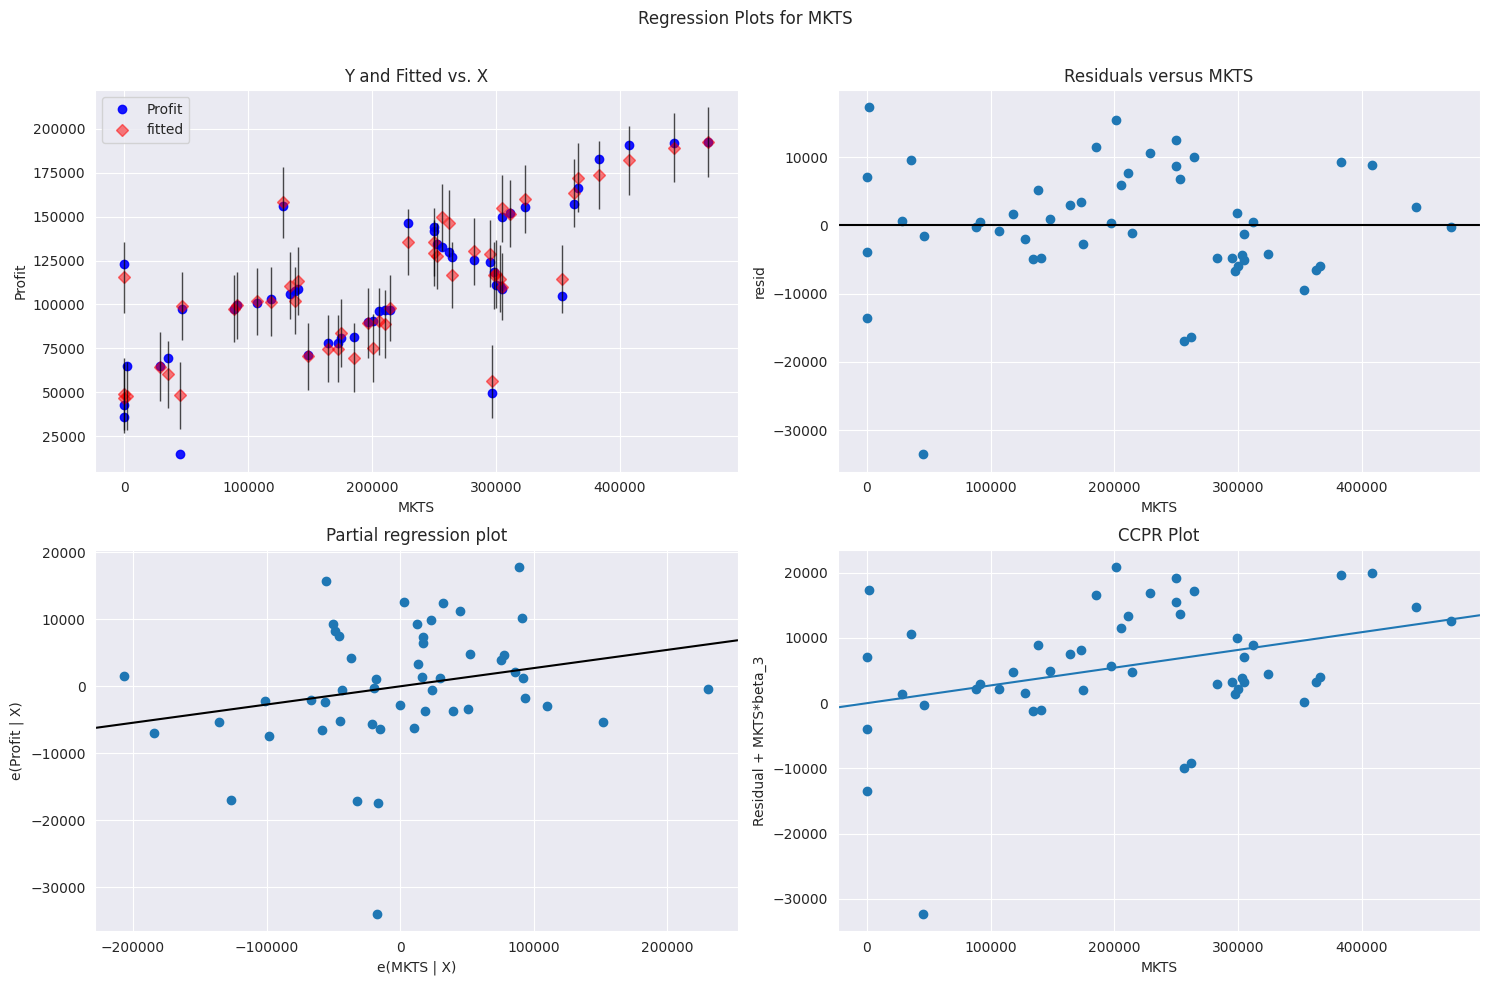

In [33]:
fig = plt.figure(figsize =(15,10))
fig = sm.graphics.plot_regress_exog(model,'MKTS',fig = fig)
plt.show()

In [35]:
# model deletion diagnostics
# detect influencer/outliers
#cooks distance
model_inf = model.get_influence()# this method return 2 value i.e cooks distance and p value.
(c,_)=model_inf.cooks_distance # we dont need p value so we use _ here that is temporary place holder.
c


array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

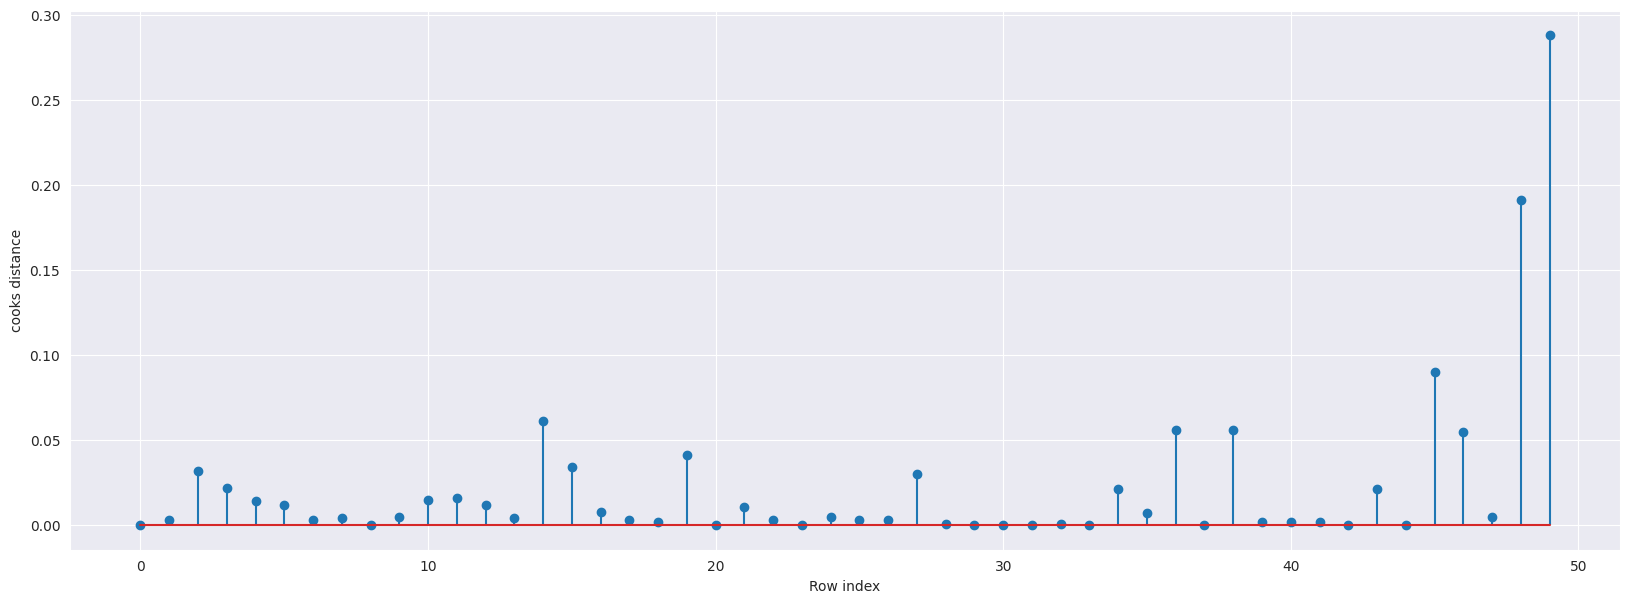

In [36]:
# plot for influencer values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(startup)),np.round(c,3)) # index value of car on x-axis
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [41]:
# index and value of outlier/influencer where c is more than 1.
# The cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.
(np.argmax(c),np.max(c)) # agrmax() gives index value of max value in data set
#0.28808229275432673 is cook's distance for index 49

(49, 0.28808229275432673)

In [42]:
# high influence point
startup.shape

(50, 5)

In [43]:
# leverage
k = startup.shape[1]# k is no of variables as 5
n = startup.shape[0] # no of data points as 50
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.36

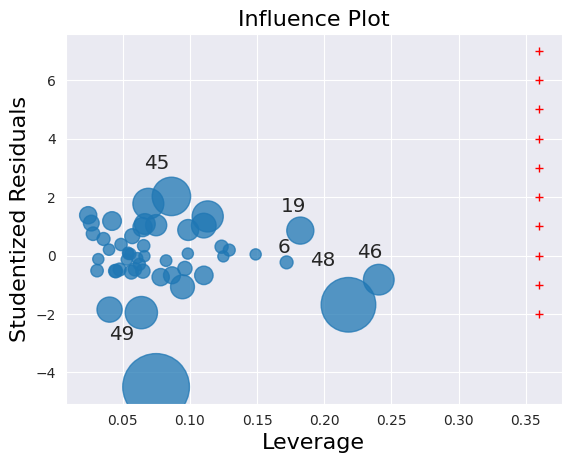

In [40]:
influence_plot(model,alpa=0.5)
y =[i for i in range(-2,8)] # -2 to 8 : 10 values for printing + in red color
x = [leverage_cutoff for i in range(10)] # 10 values for printing + in red color
plt.plot(x,y,'r+')
plt.show()

In [44]:
startup[startup.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [50]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
startup=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
startup

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [51]:
# see the differences between hp and other variable values
startup.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
#improving the model
# removal of outliers
start_new = startup.copy()
start_new

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
# again build model
final_model = smf.ols('Profit~ADMS+RDS+MKTS',data = startup).fit()

In [55]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           8.85e-32
Time:                        06:45:38   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
ADMS          -0.0222      0.043     -0.518      0.607      -0.109       0.064
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#New data for prediction
new_data=pd.DataFrame({'RDS':88000,'ADMS':157864.55,"MKTS":219839.44},index=[1])
new_data

,RDS,ADMS,MKTS
1,88000,157864.55,219839.44


In [59]:
# Manual prediction
final_model.predict(new_data)


1    123329.141195
dtype: float64

In [62]:
#Automatic Prediction
pred_y = final_model.predict(start_new)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [64]:
Prepared_Models=pd.DataFrame(['Model','final_model'],index=[0,1])
new_data

,RDS,ADMS,MKTS
1,88000,157864.55,219839.44


In [65]:
data={'Prepared_models':['Model','final_model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data)
table

,Prepared_models,Rsquared
0,Model,0.950746
1,final_model,0.961316
